The purpose of this example is to demonstrate how a semi-structured set of information can form a model for analysis.  It is not a model for execution, but is typical of how the semi-structured information can be analysed.  CMDB is an example.  MEDA is another example.

In [1]:
from hypernetworks.core.Hypernetwork import Hypernetwork
from hypernetworks.core.Hypersimplex import VERTEX, ALPHA, BETA, PROPERTY, UNION_ALPHA, IMMUTABLE_ALPHA, SEQUENCE, hstype_to_str
from hypernetworks.utils.HTCompiler import load_parser, compile_hn
from hypernetworks.utils.HTGraph import draw_hn

from IPython.display import Image, display

parser = load_parser()

In [2]:
ht_mindmap = """
	HT
		Standard HT
			Parts
				Alpha
					Alpha Union
				Beta
				Vertex
				Property
			Hypersimplex
				Simplex
				R
				Part-of
				Boundary
				Traffic Functions
					psi
					Inverse psi
					phi
					Inverse phi
				Dynamics
					Point in Time
			Simplex
				Vertex
			R
				Types of R
					Anonymous
					Implicit
					Explicit
				Key to HT
					Forms the levels
					Forms the n-ary relations
				Keeping R open gives flexibity
			n-ary
			Multilevel
				Level
			Vertex
			Alpha
				Mereology
				AND
			Beta
				Taxonomy
				OR
			Backcloth
			Traffic
		HT Extensions
			Boundary
			Properties
			Coloured
			Mutability
			Flexibility
				Beta
				Alpha Union
				Flex/Null
				Sequences
		Algebra
			Merging
				Hyperunion
			Splitting
				Sub-Hn
					Subset
				Intersection
			Member
			Empty Hn
		Concepts
			Containment
				Mereology
				Mereological
			Categorical
				Taxonomy
			Shared Faces
			Relations
				Top-down
				Left-right
			Q
				Q-Analysis
				Q-connected
				Q-near
				Q-percolation
				Q-transmission
			Simplical Complexes
			Model Types
				Abstract
				Concrete
				Dynamics
			R-analysis
				R-connected
				R-near
				R-hole
				R-percolation
					psi
					inv psi
				R-transmission
					phi
					inv phi
			Logic
				AND
				OR
			Searchable
				Simple
				Vertical
				Horizontal
				Search Space
				Boundary Search
					Boundary
				Identification
			Change
				Dynamics
					chi
				Backcloth
					Merge
					Split
				Reconstruction
					Backcloth
						Merge
						Split
					Sub-Hn
					Flexibility
					Boundaries
					Identification
			Analysis
				Peaks
				Paths
			Peaks
			Paths
			Semantics
				General Semantics
				Semantic Comparibility
				Synonyms
	Potential
		Modelling Language
		Views
		Analysis
	Implementation
		Hora
			Searchable
	Alternatives
		Object-Orientation
			Modelling
				Categorical
				Class Models
			Programming Paradigm
			Instantiation
		Semantic Web
			Ontologies
				Instantiation
		Network Theory
		Networks of Networks
			Multiplex networks
		Hypergraphs
		Domain Driven Design
			Class Models
		Hierarchies
		Heterarchies
		Directed Acyclic Graph
		Knowledge Graphs
	Examples
		SEMS
			Directed Acyclic Graph
			Choreograph
		MEDA
			Semantic Web
			Hyperunion
		Railway
			Hyperunion
		HyperPn
			Choreograph
			Hyperunion
			Shared Faces
		Herbot
		Cat
			Identify Whole from Parts
				Identification
		University
			Object-Orientation
		This Thesis
		Faces
		Simpson’s Finger
			Boundary
	Psychology
		Constructivism
			Memory organisation packets
			Scenes
			scriptlets
		Schema
	Questions
		What is needed from a model/language?
		What is needed to describe a system?
			Structure
				Backcloth
			Behaviour
			Data
				Traffic
		What can we do with Hypernetworks?
		What can we do with that description?
		Do we need to extend HT?
			HT Extensions
		What is a Hypernetwork?
			Description of a Complex System
			Analytical description
		What are the key concepts of reasoning?
			AND
			OR
			NOT
"""

In [3]:
def _strip_item(item):
#     indent = len(item)-len(item.lstrip('\t'))
    new_item = item.replace(" ", "-") \
                    .replace("?", "") \
                    .replace("(", "") \
                    .replace(")", "") \
                    .replace("'", "") \
                    .replace("’", "") \
                    .replace("/", "-") \
                    .lstrip('\t')
    
#     new_item = item.replace("’", "") \
#                     .lstrip('\t')

    return new_item
    

class Node:
    def __init__(self, indented_line):
        self.children = []
        self.level = len(indented_line) - len(indented_line.lstrip())
        self.text = indented_line.strip()

    def add_children(self, nodes):
        childlevel = nodes[0].level

        while nodes:
            node = nodes.pop(0)

            if node.level == childlevel: # add node as a child
                self.children.append(node)
            
            elif node.level > childlevel: # add nodes as grandchildren of the last child
                nodes.insert(0,node)
                self.children[-1].add_children(nodes)
        
            elif node.level <= self.level: # this node is a sibling, no more children
                nodes.insert(0,node)
                return

    def as_dict(self):
        if len(self.children) >= 1:
            return {self.text: [node.as_dict() for node in self.children]}

        else:
            return self.text


def process_mindmap(indented_text):
    root = Node('root')
    root.add_children([Node(line) for line in indented_text.splitlines() if line.strip()])
    
    return root.as_dict()['root']


def gen_hn(tree):
    hn = Hypernetwork()
    
    def _gen_hn(_name="", _tree=None):
        simplex = []

        if isinstance(_tree, list):
            hs = {}

            for leaf in _tree:
                if isinstance(leaf, dict):
                    simplex.extend(_gen_hn(_tree=leaf))
                    
                elif isinstance(leaf, str):
                    simplex.append(_strip_item(leaf))
            
            if _name:
                boundary=set("mindmap")
                hn.insert(vertex=_strip_item(_name), simplex=simplex, hstype=UNION_ALPHA, B={"mindmap"})

        if isinstance(_tree, dict):
            for name, leaf in _tree.items():                
                _gen_hn(name, leaf)
                simplex.append(_strip_item(name))
            
            return simplex


    for leaf in tree:
        _gen_hn(_tree=leaf)
        
    for name, hs in hn.hypernetwork.items():
        if hs.hstype == VERTEX and len(hs.partOf) == 1:
            hn.hypernetwork[name].hstype = PROPERTY
        
    return hn


ht = gen_hn(process_mindmap(ht_mindmap))

# draw_hn(ht, fname="/tmp/thesis_hn", view=False, direction="LR", split_camel=False)
# Image(filename='/tmp/thesis_hn.png', width=2000, height=500)

In [4]:
chapters = Hypernetwork()

compile_hn(chapters, parser, """
    Thesis=¬<Introduction, KeyConcepts, Problem, Foundations, CHn, Examples=U<Implementation>, Analysis; B(Chapters)>
    
    KeyConcepts=<Psychology, Alternatives; B(Chapters)>
    Problem=<Questions; B(Chapters)>
    Foundations=<HT; B(Chapters)>
    CHn=<Modelling, Concepts; B(Chapters)>
""")

# draw_hn(chapters, fname="/tmp/chapters", view=False, direction="LR", split_camel=False)
# Image(filename='/tmp/chapters.png', width=300, height=500)

ERROR: lark exception Unexpected Token


Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/lark/lexer.py", line 478, in lex
    yield lexer.next_token(lexer_state, parser_state)
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/lark/lexer.py", line 400, in next_token
    state=parser_state, terminals_by_name=self.terminals_by_name)
lark.exceptions.UnexpectedCharacters: No terminal matches '¬' in the current parser context, at line 2 col 12

    Thesis=¬<Introduction, KeyConcepts, Problem, Fo
           ^
Expected one of: 
	* "<>"
	* LPAR
	* LBRACE
	* BANG
	* LESSTHAN
	* "\\\\"
	* NAME
	* "{}"

Previous tokens: Token('EQUAL', '=')


During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/hypernetworks/utils/HTCompiler.py", line 260, in compile_hn
    tree = parser.parse(hs_string)
  File "/

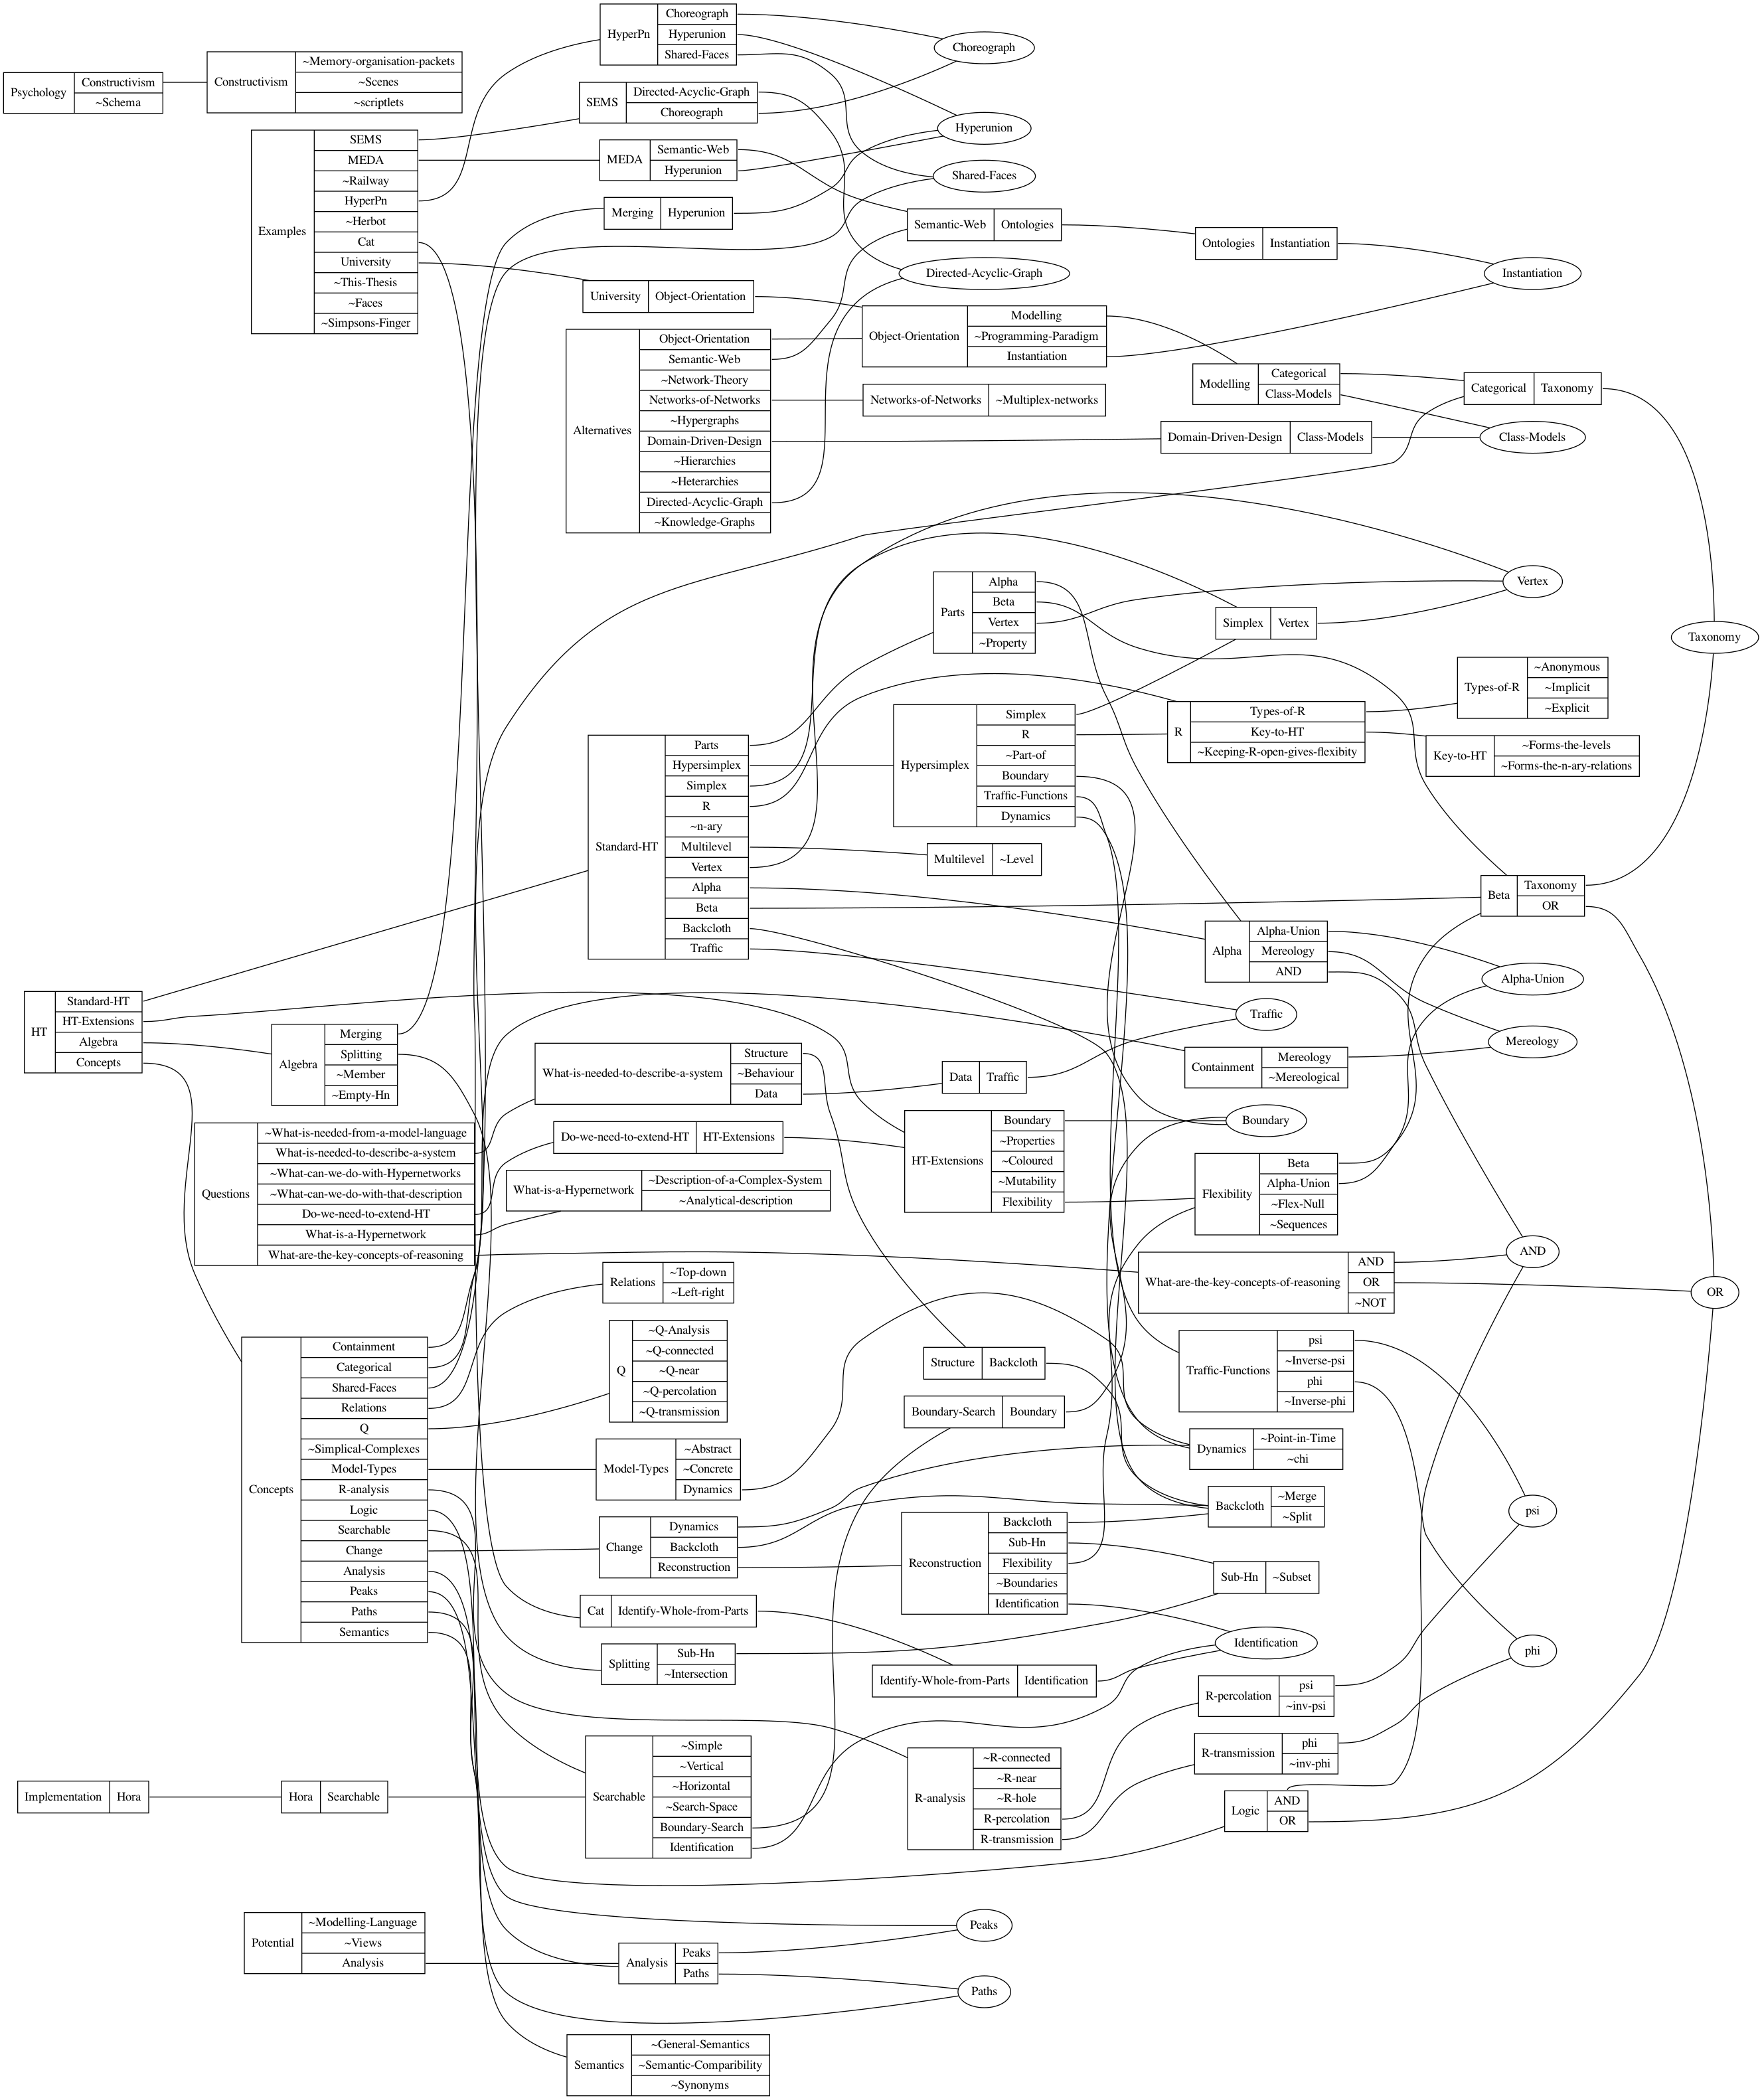

In [5]:
thesis = Hypernetwork()

thesis.union(ht)
thesis.union(chapters)

draw_hn(thesis, fname="/tmp/thesis", view=True, direction="LR", split_camel=False)
Image(filename='/tmp/thesis.png', width=2000, height=500)

In [6]:
analysis = Hypernetwork()

compile_hn(analysis, parser, """
    structure={}
""")

draw_hn(analysis, fname="/tmp/analysis", view=False, direction="LR", split_camel=False)
Image(filename='/tmp/analysis.png', width=300, height=500)